# PyTorch Workflow

* https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to the data (trainning)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all back together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (trainning)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all back together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch building block for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)

*   Data can be almost anything (excel, images, video, audio,...)

To showcase this, let`s create some *known* data using the linea regression formula.

* Y = a * xb

We`ll use a linear regression formula to make a straight line with *known* parameters



In [3]:
# Create *known* parameters
weight = 0.7 # b
bias = 0.3 # a

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

 ### Splitting data into train adn test sets

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [6]:
X_train , y_train = X[:train_split], y[:train_split]
len(X_train), len(y_train)

(40, 40)

In [7]:
X_test, y_test = X[train_split:], y[train_split:]
len(X_test), len(y_test)

(10, 10)

How might we better visualize our data?

In [8]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
  """
  Plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  #Check if there are predictions
  if predictions is not None:
    # Plot the predictions
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

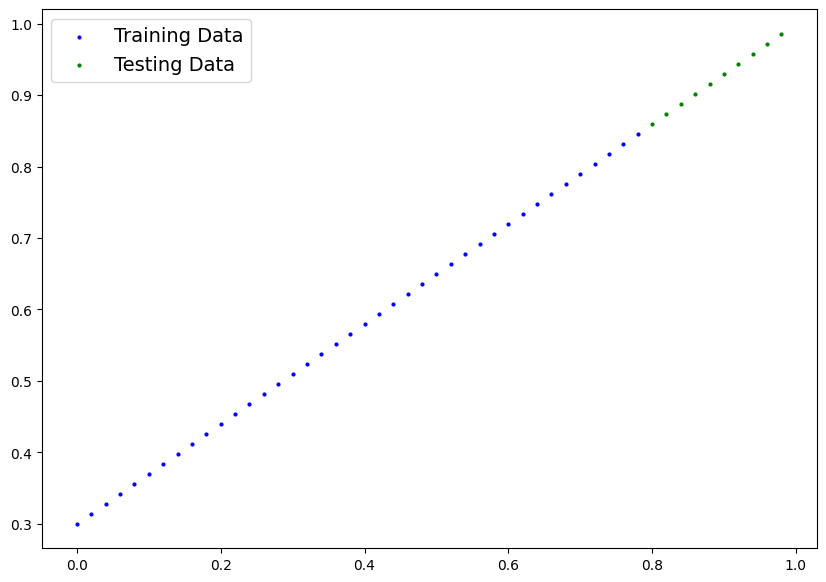

In [9]:
plot_predictions()

## 2. Build model

Two main methods to adjust the random numbers

*   Gradient descent
*   Backpropagation



In [10]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

## PyTorch model building essentials

* torch.nn - contains all of the building for cumputational graphs
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Model - the base vlass ofr all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradiant descent
* def forward - all nn.Model subclass requiere you to overwarite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

We can check our model parameters using *.parameters*

In [11]:
# Create a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using torch.indefenrence_model()

How well it predicts *y_test* based on *X_test*

In [13]:
# Make predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

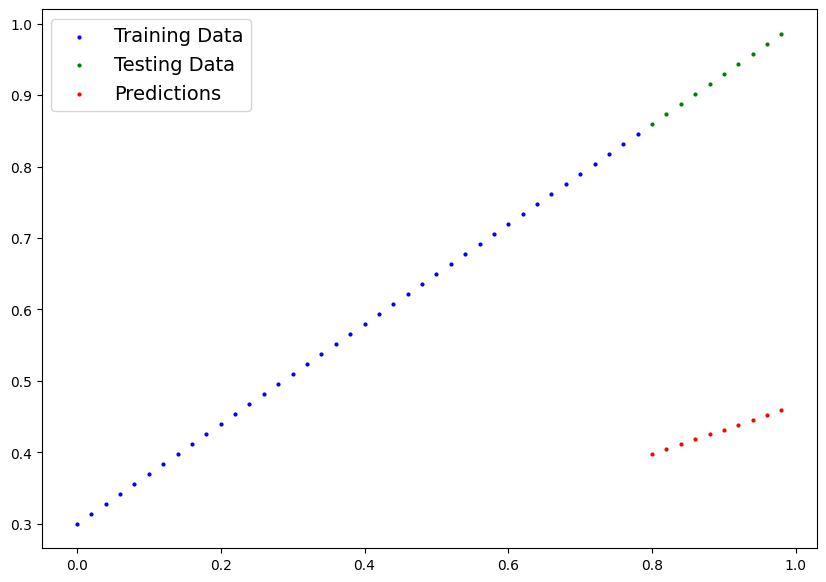

In [14]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is for model to move from som *unknown* parameters to some *known* parameters.

One way to measure your model is to use a loss function

* Loss function == cost function
* Loss function : Measures how good are the predictions
* Optimizer : Takes the loss of the model and change the parameters to minimize it


For PyTorch:
* A train loop
* A lest loop

In [15]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) # lr -> Learning Rate

### Building a training and testing loop

You will need:
0. Loop through the data
1. Forward pass (this involves data moving through the forward function) to make predictions
2. Calculate the loss
3. Optimize zero grad
4. Loss backward - calculate gradients (**backpropagation**)
5. Optimizer step (**gradiant descent**)


In [16]:
# How many loops
epocks = 1

### Training
# 0. Loop data
for epock in range(epocks):
  # Set the model to training mode
  model_0.train() # Training mode set requiere gradients = True for the parameters that requiere gradients

  # 1. Forward pass
  y_pred = model_0(X_train) # Makes prediction from the training set

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train) # Calculate the diference between the prediction and the actual data

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Perform gradient descent
  optimizer.step()

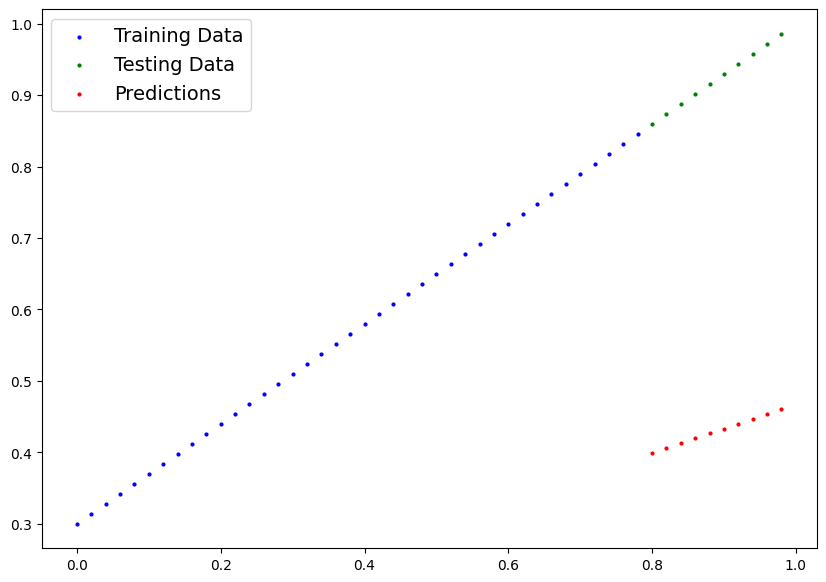

In [17]:
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)